# Pipeline for extraction and analys informations from Report

In this notebook we will see how to extract informations from report in pdf format, how to fetch usefull informations from it and how to analyse those informations.

First of all, let's import packages:
- `os`: Various interfaces for the operating system
- `sys`: System specific parameters and fonctions
- `shutil`: Operations on files an foldes
- `metaData`: Fetching informations from raw text and PDF
- `dataExtraction`: Work with pdf and raw data extraction
- `TrQuestions` : Work with transformer for QnA
- `TrSentymentAnalysis` : Work with transformer for Sentyment Analysis

In [1]:
import os
import sys
import shutil
import metaData
import dataExtraction
import TrQuestions
import TrSentymentAnalysis

Now let's extract informations from the pdf reports:
- `shutil.rmtree(path)`: remove older exemples pdf
- `os.mkdir(path)`: recreate the pdf exemples folder
- `dataExtraction.DownloadPDF(number_of_pages, path)`: download the amount of pdf asked
- `dataExtraction.PDFToText(path)`: extract text from pdf file

**/!\ This cell will delete PATH_TO_PDF_REPORTS folder**

In [2]:
PATH_TO_PDF_REPORTS = "./pdf"
if os.path.exists(PATH_TO_PDF_REPORTS): shutil.rmtree(PATH_TO_PDF_REPORTS)
os.mkdir(PATH_TO_PDF_REPORTS)

extractedFiles = dataExtraction.DownloadPDF(1, PATH_TO_PDF_REPORTS)
exportedPDF = [dataExtraction.PDFToText(path) for path in extractedFiles]

Number of reports to download: 20
	Report 70660O downloaded
	Report 61811I downloaded
	Report 62360G downloaded
	Report 64810V downloaded
	Report 13299E downloaded
	Report 20440Q downloaded
	Report 16871V downloaded
	Report 17443F downloaded
	Report 70760S downloaded
	Report 12936D downloaded
	Report 07518E downloaded
	Report 19458F downloaded
	Report 20205G downloaded
	Report 60660I downloaded
	Report 62930V downloaded
	Report 71330V downloaded
	Report 14194S downloaded
	Report 19209H downloaded
	Report 12792F downloaded
	Report 81016V downloaded


And what about analysing this data ?
- `metaData.getInfo(data, from_text=bool)`: parse raw text to extract usefull informations
- `TrQuestions.getQnA(data, from_text=bool)`: send the informations to the transformer to fetch results
- `TrSentymentAnalysis.getSentiment(data)`: perfom sentiment analysis with our transformer

In [3]:
results = [] 

for report in exportedPDF:
    reportInfos = metaData.getInfo(report, from_text=True)
    questionResults = TrQuestions.getQnA(reportInfos, from_text=True)
    print("Roll:", reportInfos[2])
    singleResult = []
    for answer in questionResults:
        sentiment = TrSentymentAnalysis.getSentiment(answer['result']['answer'])[0]
        print(f"{answer['question']}: {sentiment}")
        singleResult.append({'question':answer, 'sentiment': sentiment})
    results.append(singleResult)
    print("")

Roll: 70660O
What is the school name: {'label': 'POSITIVE', 'score': 0.8837955594062805}
What is the school address: {'label': 'POSITIVE', 'score': 0.5663627982139587}
What is the roll number: {'label': 'NEGATIVE', 'score': 0.9069156050682068}
What is the date of evaluation: {'label': 'POSITIVE', 'score': 0.988521933555603}
What is the quality of pupils: {'label': 'POSITIVE', 'score': 0.9541466236114502}
What is the quality of teaching: {'label': 'POSITIVE', 'score': 0.9997256398200989}
What is the quality of support: {'label': 'POSITIVE', 'score': 0.9541466236114502}
What is the quality of leadership: {'label': 'POSITIVE', 'score': 0.9541466236114502}
What is the quality of school: {'label': 'POSITIVE', 'score': 0.9541466236114502}

Roll: 61811I
What is the school name: {'label': 'POSITIVE', 'score': 0.6895032525062561}
What is the school address: {'label': 'NEGATIVE', 'score': 0.5183372497558594}
What is the roll number: {'label': 'NEGATIVE', 'score': 0.8207156658172607}
What is the 

What is the quality of leadership: {'label': 'POSITIVE', 'score': 0.9997269511222839}
What is the quality of school: {'label': 'POSITIVE', 'score': 0.9997289180755615}

Roll: 20205G
What is the school name: {'label': 'POSITIVE', 'score': 0.9541466236114502}
What is the school address: {'label': 'POSITIVE', 'score': 0.9541466236114502}
What is the roll number: {'label': 'POSITIVE', 'score': 0.9057143926620483}
What is the date of evaluation: {'label': 'POSITIVE', 'score': 0.9873773455619812}
What is the quality of pupils: {'label': 'POSITIVE', 'score': 0.9541466236114502}
What is the quality of teaching: {'label': 'POSITIVE', 'score': 0.9996676445007324}
What is the quality of support: {'label': 'POSITIVE', 'score': 0.9541466236114502}
What is the quality of leadership: {'label': 'POSITIVE', 'score': 0.9997269511222839}
What is the quality of school: {'label': 'POSITIVE', 'score': 0.9998070597648621}

Roll: 60660I
What is the school name: {'label': 'POSITIVE', 'score': 0.972872912883758

{'label': 'POSITIVE', 'score': 0.9997256398200989}
20


(array([ 0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

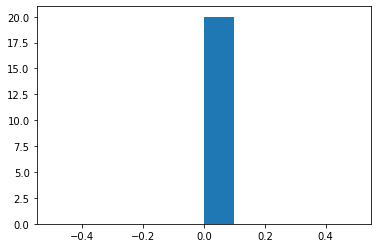

In [18]:
import numpy as np
import matplotlib.pyplot as plt

print(results[0][5]['sentiment'])
print(len(results))
counts, bins = np.histogram([int(r[5]['question']['result']['score']) * (-1) if r[5]['sentiment']['label'] == 'NEGATIVE' else int(r[5]['question']['result']['score']) for r in results])
# Quality of teaching
plt.hist(bins[:-1], bins, weights=counts)